![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020 - Stephanie Beyer Diaz
# Statistical & Machine Learning Approaches for Marketing

## Assignment 5, Session 6

**1. Import all required libraries and datasets**

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

library(e1071)

Warning message:
"package 'mlr' was built under R version 3.6.2"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.2"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train

Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'MASS' was built under R version 3.6.2"Warning message:
"package 'e1071' was built under R version 3.6.2"
Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute



**Exercise 3 (p.414, Chap.10)**<br><br>
*In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features.*<br><br>
*(a) Plot the observations.*

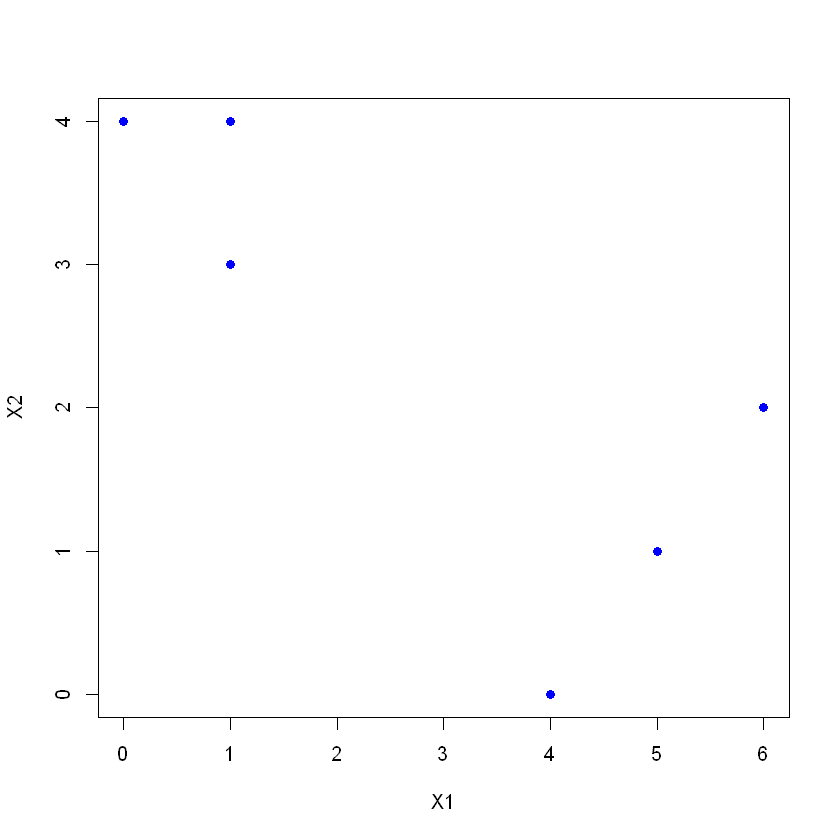

In [21]:
X1 <- c(1,1,0,5,6,4)
X2 <- c(4,3,4,1,2,0)

plot(X1, X2, pch=16, col='blue')

*(b) Randomly assign a cluster label to each observation. You can
use the sample() command in R to do this. Report the cluster
labels for each observation.*

[1] 2 1 1 2 1 2

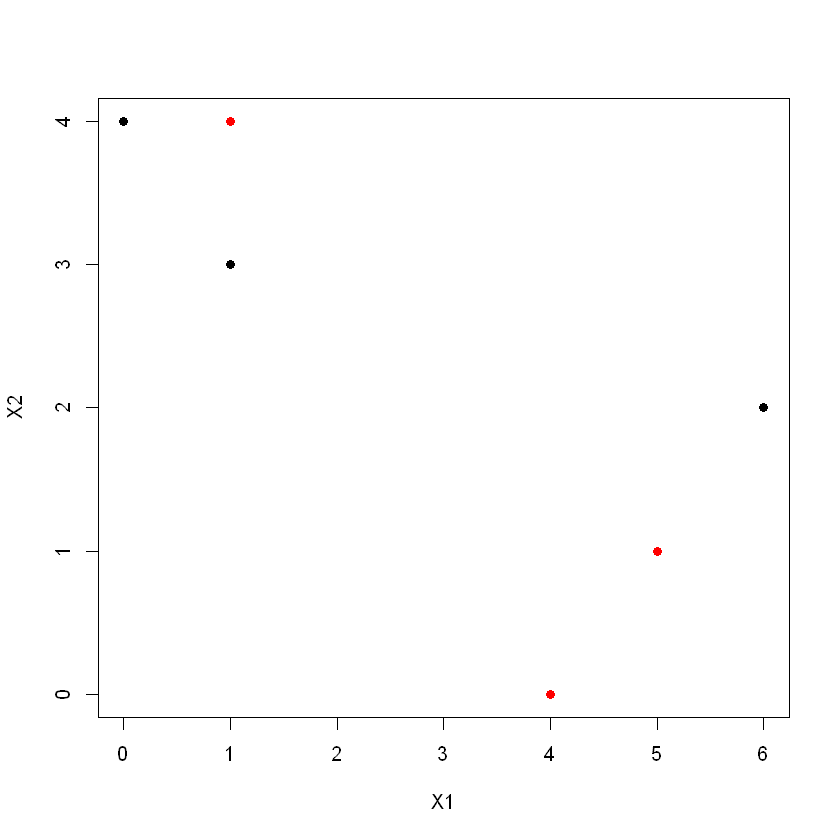

In [35]:
set.seed(7)
labels <- sample(2, length(X1), replace = T)
labels

plot(X1, X2, col = (labels), pch = 16)

#Cluster 1 (X1, X2): (1, 4), (4, 0), (5, 1) #red
#Cluster 2 (X1, X2): (0, 4), (1, 3), (6, 2) #black

*(c) Compute the centroid for each cluster.*

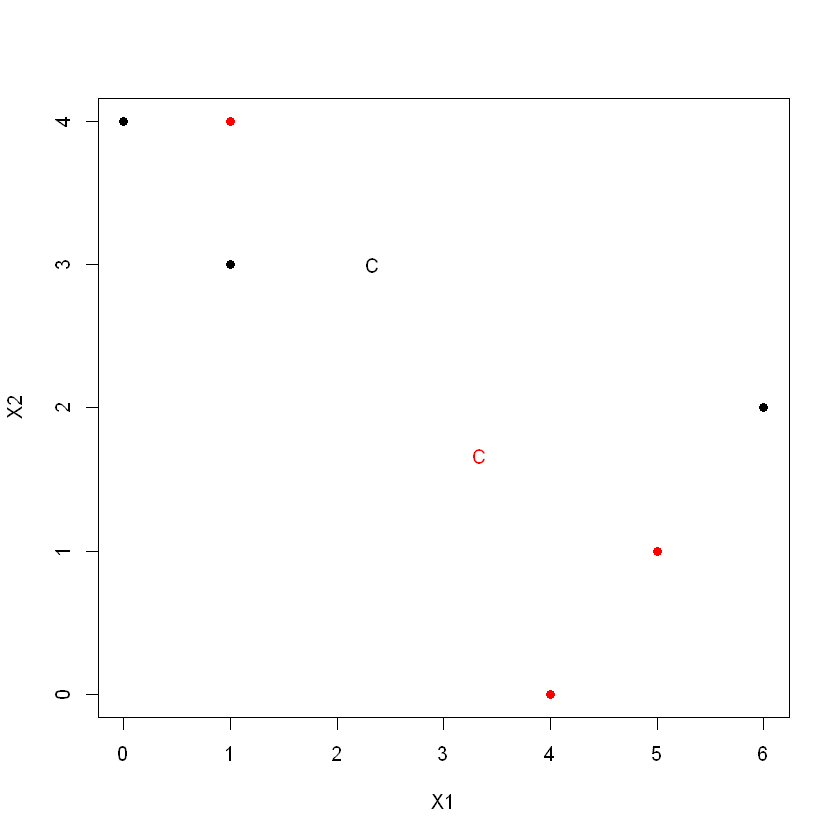

In [54]:
centroid1 <- c(mean(X1[labels == 1]), mean(X2[labels == 1]))
centroid2 <- c(mean(X1[labels == 2]), mean(X2[labels == 2]))

plot(X1, X2, col=(labels), pch = 16)
points(centroid1[1], centroid1[2], col = 1, pch = 'C')
points(centroid2[1], centroid2[2], col = 2, pch = 'C')

*(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.*

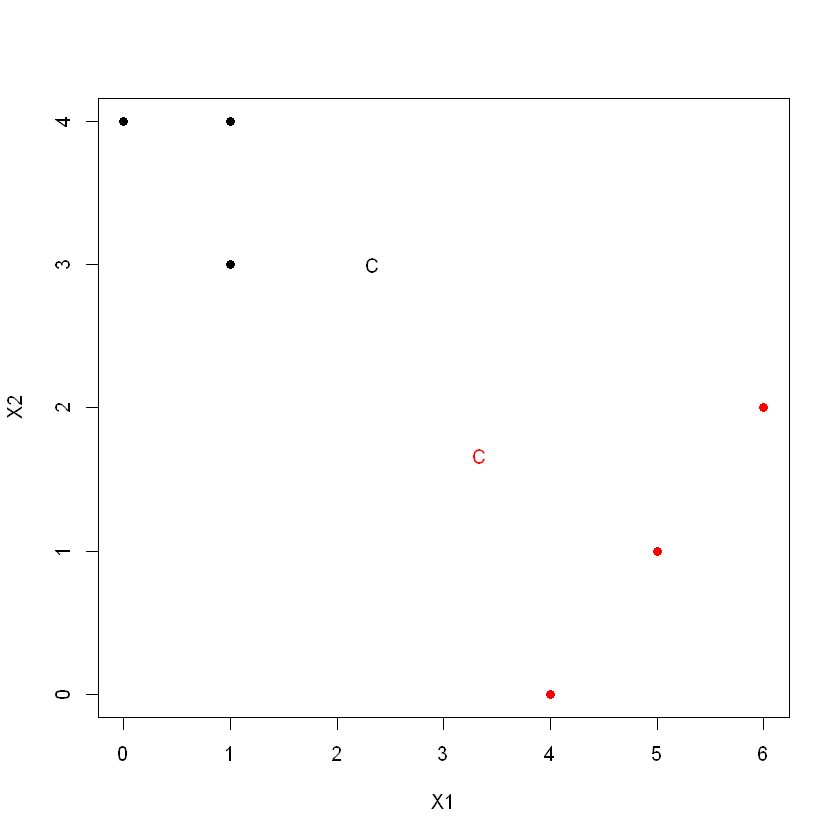

In [77]:
# defining euclidean distance as a function
eucdist <- function(X, C){sqrt((X[1] - C[1])^2 + (X[2] - C[2])^2)}

# initiating empty list to append cluster labels
labels <- c()

# loop to label according to smallest euclidean distance to centroids 1 and 2
for (i in 1:length(X1)){
    X <- cbind(X1[i], X2[i])
    if (eucdist(X,centroid1) < eucdist(X,centroid2)){
        labels <- rbind(labels,1)
    } else{
        labels <- rbind(labels,2)
    }
}

plot(X1, X2, col = (labels), pch = 16)
points(centroid1[1], centroid1[2], col = 1, pch = 'C')
points(centroid2[1], centroid2[2], col = 2, pch = 'C')

*(e) Repeat (c) and (d) until the answers obtained stop changing.*

Warning message in if ((c(mean(X1[labels == 1]), mean(X2[labels == 1])) == centroid1) & :
"the condition has length > 1 and only the first element will be used"Warning message in if ((c(mean(X1[labels == 1]), mean(X2[labels == 1])) == centroid1) & :
"the condition has length > 1 and only the first element will be used"

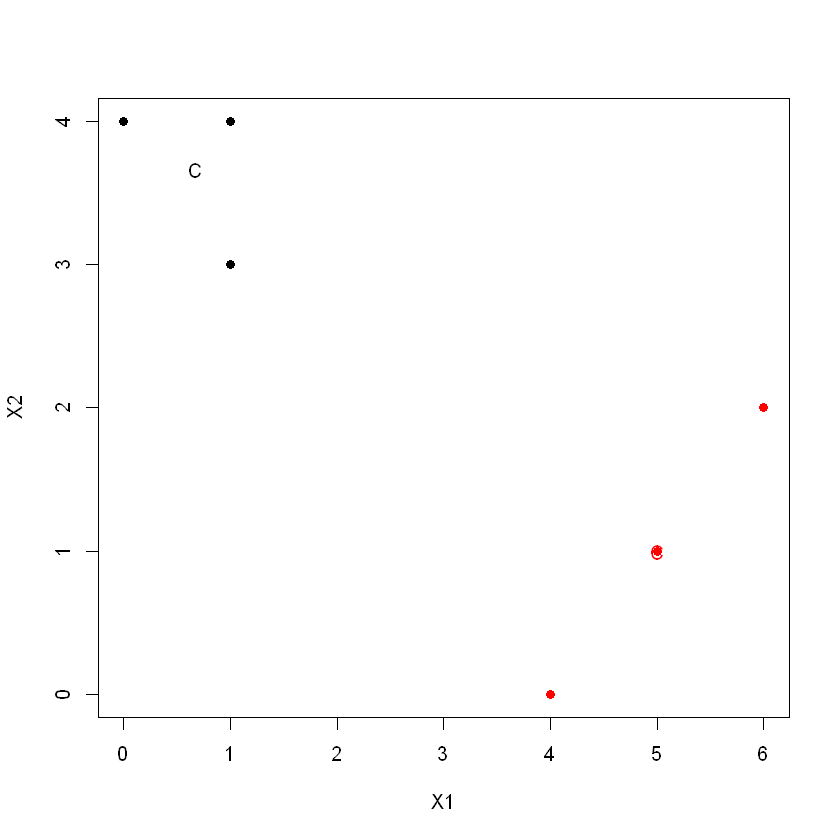

In [79]:
# initiating empty list to append cluster labels
labels_new <- c()

# loop to label according to smallest euclidean distance to centroids 1 and 2
while (T){
    for (i in 1:length(X1)){
        X <- cbind(X1[i], X2[i])
        if (eucdist(X,centroid1) < eucdist(X,centroid2)){
            labels_new <- rbind(labels_new,1)
        } else{
            labels_new <- rbind(labels_new,2)
        }
    }
    if ((c(mean(X1[labels == 1]), mean(X2[labels == 1]))==centroid1)&
       c(mean(X1[labels == 2]), mean(X2[labels == 2]))==centroid2)
        {break
        }
    else{
        centroid1 <- c(mean(X1[labels == 1]), mean(X2[labels == 1]))
        centroid2 <- c(mean(X1[labels == 2]), mean(X2[labels == 2]))}
}

plot(X1, X2, col = (labels), pch = 16)
points(centroid1[1], centroid1[2], col = 1, pch = 'C')
points(centroid2[1], centroid2[2], col = 2, pch = 'C')

*(f) In your plot from (a), color the observations according to the
cluster labels obtained.*

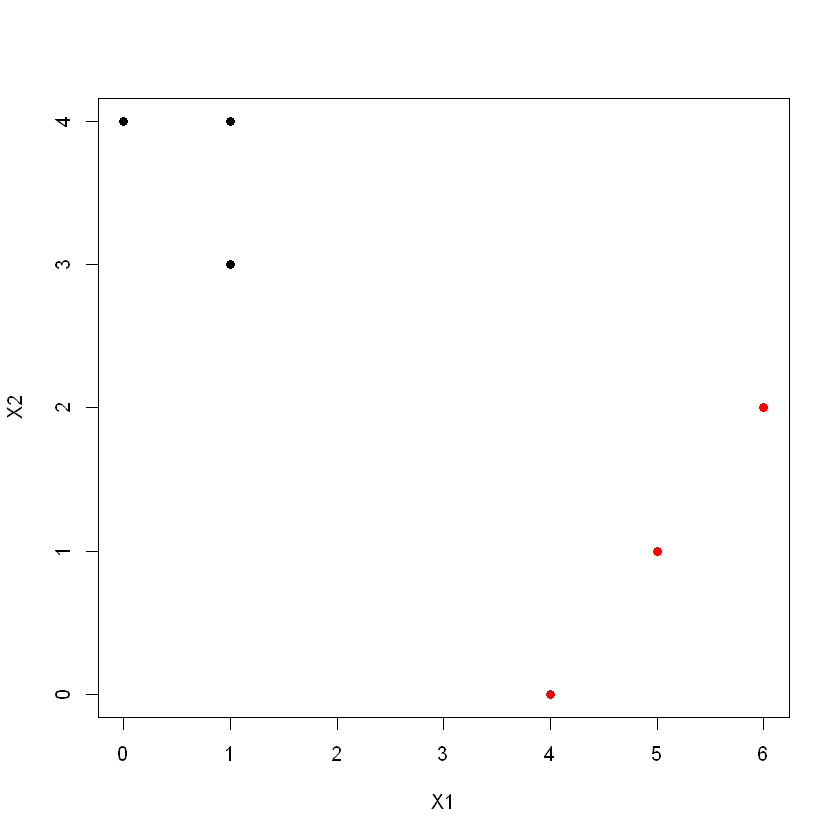

In [78]:
plot(X1, X2, col = (labels), pch = 16)

**Exercise 8 (p.416, Chap.10)**<br><br>
*In Section 10.2.3, a formula for calculating PVE was given in Equation
10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function.
On the USArrests data, calculate PVE in two ways:<br><br>
(a) Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.*

*(b) By applying Equation 10.8 directly. That is, use the prcomp()
function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.
These two approaches should give the same results.*<br><br>
*Hint: You will only obtain the same results in (a) and (b) if the same
data is used in both cases. For instance, if in (a) you performed
prcomp() using centered and scaled variables, then you must center
and scale the variables before applying Equation 10.3 in (b).*

**Exercise 9 (p.416, Chap.10)**<br><br>
*Consider the USArrests data. We will now perform hierarchical clustering
on the states.*<br><br>
*(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.*

*(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?*

*(c) Hierarchically cluster the states using complete linkage and Euclidean
distance, after scaling the variables to have standard deviation
one.*

*(d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.*

**Exercise 10 (p.417, Chap.10)**<br><br>
*In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.<br><br>
(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.<br><br>
Hint: There are a number of functions in R that you can use to
generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations
in each class so that there are three distinct classes.*

*(b) Perform PCA on the 60 observations and plot the first two principal
component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.*

*(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering
compare to the true class labels?<br><br>
Hint: You can use the table() function in R to compare the true
class labels to the class labels obtained by clustering. Be careful
how you interpret the results: K-means clustering will arbitrarily
number the clusters, so you cannot simply check whether the true
class labels and clustering labels are the same.*

*(d) Perform K-means clustering with K = 2. Describe your results.*

*(e) Now perform K-means clustering with K = 4, and describe your
results.*

*(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.*

*(g) Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain.*